In [1]:
import scipy.linalg as la
from math_functions.helper_fns import *
from main_grape.Grape import Grape
from main_grape.Evolve import Evolve
import numpy as np
%pylab inline
from IPython import display

Populating the interactive namespace from numpy and matplotlib


In [2]:

#Defining time scales
total_time = 10.0
steps = 300

#Defining H0
qubit_state_num = 2
qubit_num = 3

Q_x   = np.diag(np.sqrt(np.arange(1,qubit_state_num)),1)+np.diag(np.sqrt(np.arange(1,qubit_state_num)),-1)
Q_z   = np.diag(np.arange(0,qubit_state_num))
I_q = np.identity(qubit_state_num)

H0 = multi_kron(Q_z,qubit_num) 
       

#Defining Forbidden sates

#states_forbidden_list = [3]

psi0 = concerned(qubit_num,qubit_state_num)

#Defining states to include in the drawing of occupation
states_draw_list = range(qubit_state_num**qubit_num)
states_draw_names =[]
for ii in states_draw_list:
    states_draw_names.append(Basis(ii,qubit_num,qubit_state_num))
#Defining U (Target)

U = transmon_gate(np.reshape(Hadamard(qubit_num),[2**qubit_num,2**qubit_num]),qubit_state_num)


#Defining U0 (Initial)
q_identity = np.identity(qubit_state_num**qubit_num)
U0= q_identity

#Defining control Hs
Hops = []
Hnames = []
ops_max_amp = []
Hops,Hnames,ops_max_amp = append_separate_krons(Q_x,'x',qubit_num,qubit_state_num,Hops,Hnames,ops_max_amp)
Hops,Hnames,ops_max_amp = append_separate_krons(Q_z,'z',qubit_num,qubit_state_num,Hops,Hnames,ops_max_amp)


#Defining convergence parameters
max_iterations = 1000
decay = max_iterations/2
convergence = {'rate':0.05, 'update_step':10, 'max_iterations':max_iterations,\
               'conv_target':1e-10,'learning_rate_decay':decay}
reg_coeffs = {'alpha' : 0, 'z':0, 'dwdt':0,'d2wdt2':0, 'inter':0}
#multi_mode = {'dressed':dressed, 'vectors':v_c, 'qnum':qubit_state_num, 'mnum': mode_state_num,\
              #'f':freq_ge, 'es':w_c, 'g1':qm_g1, 'D':D, 'Interpolation':True, 'Modulation':True}





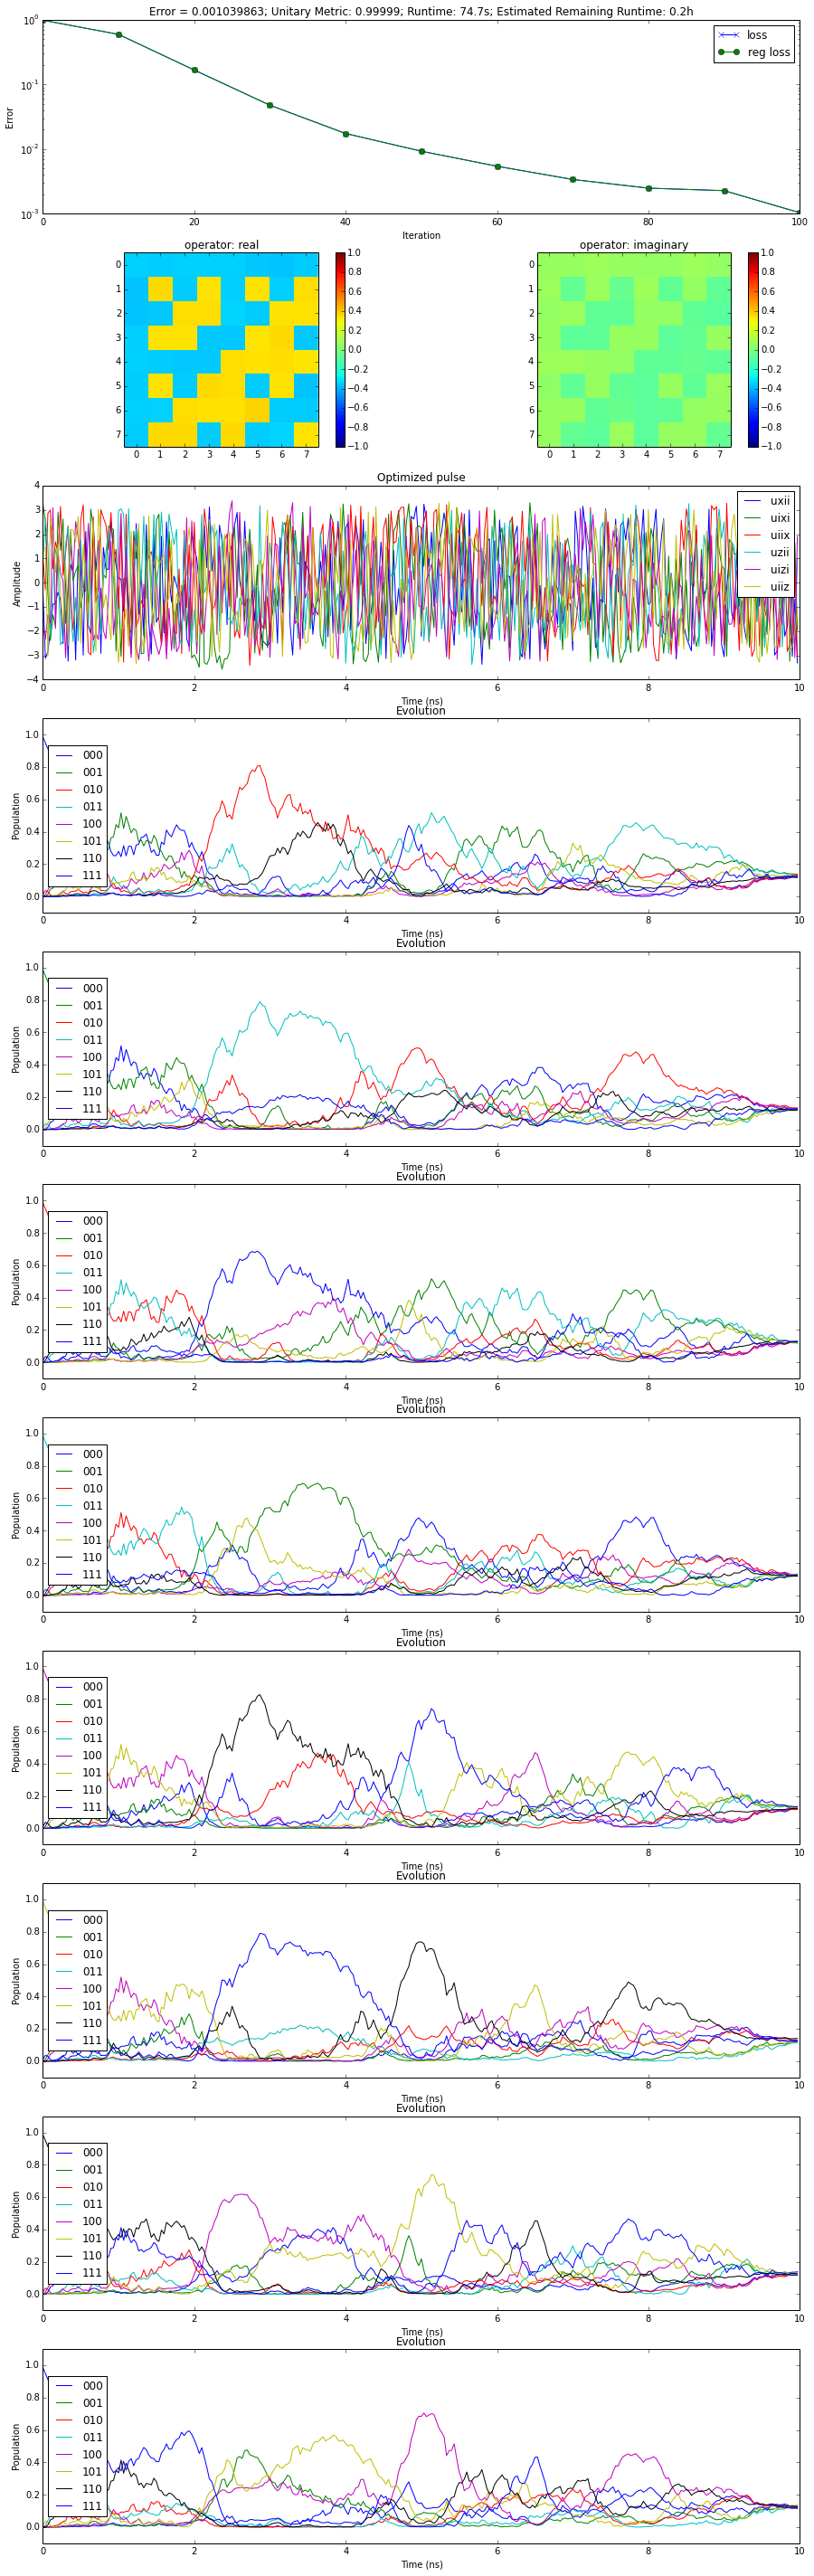

In [3]:
 #Extra options
#reg_coeffs = reg_coeffs,draw = [states_draw_list,states_draw_names] ,forbidden = states_forbidden_list,multi_mode = multi_mode,
#maxA = ops_max_amp,use_gpu = True
Grape(H0,Hops,Hnames,U,U0,total_time,steps,psi0,convergence,method = 'L-BFGS-B', switch = False, draw = [states_draw_list,states_draw_names], reg_coeffs = reg_coeffs)

In [4]:
Evolve(H0,Hops,U0,total_time,steps,psi0, u0, draw = [states_draw_list,states_draw_names], U = U)

NameError: name 'u0' is not defined